In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$         INITIAL SETTINGS - НАЧАЛЬНЫЕ УСТАНОВКИ          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [1]:
# Pandas
import pandas as pd
import numpy as np

In [18]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
from datetime import datetime

In [20]:
# Plotly
# позволяет строить интерактивные визуализации
import plotly

In [21]:
import plotly.graph_objs as go
#import plotly.express as px
#from plotly.subplots import make_subplots

In [22]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          DATA сходу         $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [479]:
# FUNCTION RENAME COLUMNS
# Функция считывает файл, трансформирует колонки и строки, переименовывает колонки,
# считает суммы, сохраняет результат в новый файл.
def report_posts():
    df = vk
    
    df['Номер месяца'] = df['Дата'].apply(lambda x: x.split('-')[1])   
    look_up = {'01' : 'январь', '02' : 'февраль', '03' : 'март', '04' : 'апрель', '05' : 'май', '06' : 'июнь', 
             '07' : 'июль', '08' : 'август', '09' : 'сентябрь', '10' : 'октябрь', '11' : 'ноябрь', '12' : 'декабрь'}

    df['Месяц'] = df['Номер месяца'].apply(lambda x: look_up[x])
    df[4,5,6,7] = df[4,5,6,7].astype(str).astype(int)
    
    return df

In [2]:
#df = report_posts()
# vk.tail()

In [556]:
# FUNCTION RENAME COLUMNS
# Функция считывает файл, трансформирует колонки и строки, переименовывает колонки,
# считает суммы, сохраняет результат в новый файл.
def report(file_path):
    df = pd.read_excel(file_path, dtype = 'object')
    
    df['Номер месяца'] = df['Дата'].apply(lambda x: x.split('-')[1])   
    look_up = {'01' : 'январь', '02' : 'февраль', '03' : 'март', '04' : 'апрель', '05' : 'май', '06' : 'июнь', 
             '07' : 'июль', '08' : 'август', '09' : 'сентябрь', '10' : 'октябрь', '11' : 'ноябрь', '12' : 'декабрь'}

    df['Месяц'] = df['Номер месяца'].apply(lambda x: look_up[x])
    df[['Лайки', 'Комментарии', 'Просмотры', 'Репосты']] = df[['Лайки', 'Комментарии', 'Просмотры', 'Репосты']].astype(str).astype(int)
    
    return df

In [3]:
# df = report(file_name)
# df.tail()

In [4]:
# df.columns

In [5]:
# df.dtypes

In [6]:
# vk.head()

In [7]:
# vk.query("category == 'Социум'").head()

In [8]:
# posts_excel.query("Категория == 'Социум'")

In [9]:
# vk.dtypes

In [10]:
#convert datetime column to just date
# Преобразование объекта в формат даты
# vk['date'] = pd.to_datetime(vk['date']).dt.date


# vk['date'] = pd.to_datetime(vk['date']).dt.normalize()
# vk.dtypes

In [11]:
# vk.query("category == 'Фото'")

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTIONS          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [12]:
# 9.4.2 Функция barplot()
# Построим диаграмму оценки количества покупок в зависимости от категории товаров:

# sns.barplot(x='category', y='views', data=vk)

In [13]:
# 9.4.2 Функция barplot()
# Построим диаграмму оценки количества покупок в зависимости от категории товаров:

# sns.barplot(x='Категория', y='Просмотры', data=df)

In [15]:
# TABLE_1: Количество постов по группам
# category_count = vk.groupby(['category'], as_index=False) \
#     .agg({'views': 'count'}) \
#     .rename(columns={'views': 'count_views'}) \
#     .sort_values('count_views', ascending = False)

# category_count

In [16]:
# TABLE_1: Количество постов по группам
# category_count_df = df.groupby(['Категория'], as_index=False) \
#     .agg({'Просмотры': 'count'}) \
#     .rename(columns={'Просмотры': 'Количество постов'}) \
#     .sort_values('Количество постов', ascending = False)

# category_count_df

In [291]:
# TABLE_2: Среднее количество просмотров по группам
# category_mean = vk.groupby(['category'], as_index=False) \
#     .agg({'views': ['count', 'mean']}) \
#     .rename(columns={'views': ['count', 'mean_views']}) \
#     .sort_values('mean_views', ascending = False)

category_mean = vk.groupby(['category'], as_index=False).agg(['min', 'mean', 'max'])
category_mean

Nr                likes               comments               views  \
          min       mean max   min      mean max      min      mean max   min   
category                                                                        
Поэзия     23  35.916667  47     0  1.416667   6        0  3.166667  19    76   
Проблемы   24  41.714286  56     0  2.761905   9        0  0.571429   2    77   
Социум      5  14.684211  36     0  5.526316  21        0  1.210526   7    50   
Увлечения   1   2.500000   4     1  7.250000  12        0  4.000000  12    90   
Фото       57  64.500000  72     0  8.437500  17        0  0.500000   4    77   

                           share                
                 mean  max   min      mean max  
category                                        
Поэзия     124.000000  226     0  0.250000   2  
Проблемы   150.333333  359     0  0.238095   2  
Социум     195.526316  484     0  0.210526   1  
Увлечения  199.500000  359     0  0.500000   1  
Фото       187.375000  332     0  0.250000   1

In [560]:
# TABLE_2: Среднее количество просмотров по группам
# category_mean = vk.groupby(['category'], as_index=False) \
#     .agg({'views': ['count', 'mean']}) \
#     .rename(columns={'views': ['count', 'mean_views']}) \
#     .sort_values('mean_views', ascending = False)

df_category_mean = df.groupby(['Категория'], as_index=False).agg(['min', 'mean', 'max'])
df_category_mean

Лайки               Комментарии               Просмотры              \
            min      mean max         min      mean max       min        mean   
Категория                                                                       
Поэзия        0  1.384615   6           0  3.000000  19        78  124.923077   
Проблемы      0  2.809524  10           0  0.571429   2        51  169.380952   
Социум        0  5.842105  21           0  1.263158   7        67  205.263158   
Увлечения     1  7.250000  12           0  4.000000  12        93  207.000000   
Фото          0  7.894737  17           0  0.421053   4         0  157.000000   

               Репосты                
           max     min      mean max  
Категория                             
Поэзия     228       0  0.230769   2  
Проблемы   454       0  0.190476   2  
Социум     487       0  0.263158   1  
Увлечения  362       0  0.500000   1  
Фото       336       0  0.210526   1

In [91]:
# TABLE_2: Общее и Среднее количество просмотров по группам
category_mean_df = df.groupby(['Категория'], as_index=False) \
    .agg({'Просмотры': 'sum'}) \
    .rename(columns={'Просмотры': 'Всего просмотров'}) \
    .sort_values('Всего просмотров', ascending = False)

category_mean_df

,Категория,Всего просмотров
2,Социум,3715
1,Проблемы,3157
4,Фото,2998
0,Поэзия,1488
3,Увлечения,798


In [189]:
# TABLE_3: Количество просмотров по группам
views_sum = vk.groupby(['category'], as_index=False) \
    .agg({'views': 'sum'}) \
    .rename(columns={'views': 'sum_views'}) \
    .sort_values('sum_views', ascending = False)

views_sum

,category,sum_views
2,Социум,3715
1,Проблемы,3157
4,Фото,2998
0,Поэзия,1488
3,Увлечения,798


In [190]:
# TABLE_3-1: Количество лайков по группам
likes_sum = vk.groupby(['category'], as_index=False) \
    .agg({'likes': 'sum'}) \
    .rename(columns={'likes': 'sum_likes'}) \
    .sort_values('sum_likes', ascending = False)

likes_sum

,category,sum_likes
4,Фото,135
2,Социум,105
1,Проблемы,58
3,Увлечения,29
0,Поэзия,17


In [33]:
# TABLE_4: Объединяем ДВЕ таблички: "category_count" и "category_sum" в одну для дальнейшего анализа.
views_1 = pd.merge(category_count, category_sum, left_on ='category', right_on = 'category', how='left')
views_1

,category,count_views,sum_views
0,Проблемы,21,3157
1,Социум,19,3710
2,Фото,16,2998
3,Поэзия,12,1488
4,Увлечения,4,798


In [34]:
# TABLE_5: Объединяем ДВЕ таблички: "category_count" и "category_sum" в одну для дальнейшего анализа.
views_2 = pd.merge(category_mean, category_count, right_on ='category', left_on = 'category', how='right')
views_2

,category,mean_views,count_views
0,Увлечения,199.500000,4
1,Социум,195.263158,19
2,Фото,187.375000,16
3,Проблемы,150.333333,21
4,Поэзия,124.000000,12


In [191]:
# TABLE_6: Объединяем ДВЕ таблички: "views_sum" и "likes_sum" в одну для дальнейшего анализа.
views_3 = pd.merge(views_sum, likes_sum, left_on ='category', right_on = 'category', how='left')
views_3

,category,sum_views,sum_likes
0,Социум,3715,105
1,Проблемы,3157,58
2,Фото,2998,135
3,Поэзия,1488,17
4,Увлечения,798,29


In [192]:
views_3.columns

Index(['category', 'sum_views', 'sum_likes'], dtype='object')

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTIONS  EXCEL        $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [211]:
# Pandas
import pandas as pd
import numpy as np

In [212]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [213]:
from datetime import datetime

In [214]:
# Plotly
# позволяет строить интерактивные визуализации
import plotly

In [215]:
import plotly.graph_objs as go
#import plotly.express as px
#from plotly.subplots import make_subplots

In [178]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [24]:
# Введите данные в форме объекта, чтобы сохранить исходную форму данных, а затем используйте astype()
# для преобразования формата данных
file_name = 'D:/father/Reclame/Spektr/Reports_Banya_Bochka/posts_barrel_sauna.xlsx'
#entries = ['Nr', 'category', 'name', 'date', 'likes', 'comments', 'views', 'share']

#posts_excel = pd.read_excel (file_name, dtype = 'object', columns = entries)
vk = pd.read_excel(file_name)

vk.tail(10)

,Номер,Дата,Категория,Название,Фото,Лайки,Комментарии,Репосты,Просмотры
127,128,2023-11-27,Реклама,Хочу баню к весне,2,7,0,0,293
128,129,2023-12-05,Сборка,"Квадро - 4,5 метра",4,4,0,2,575
129,130,2023-12-08,Видео,Установка бани,1,8,0,1,515
130,131,2023-12-13,Информация,5 Преимуществ бани бочки,1,5,0,0,167
131,132,2023-12-15,Видео,Установка бани,1,12,4,6,913
132,133,2023-12-19,Сборка,Кивер - бочка - 3 метра,5,12,0,2,516
133,134,2023-12-23,Реклама,Мангал,1,3,0,0,204
134,135,2024-01-06,Реклама,С Новым Годом,1,4,0,0,175
135,136,2024-01-08,Реклама,Акция,3,4,0,2,104
136,137,2024-01-10,Информация,Почему баня бочка,4,6,0,1,116


In [25]:
# После этой операции нужно убедиться, что таблица больше не содержит пропусков.
print(vk.isnull().sum())

Номер          0
Дата           0
Категория      0
Название       0
Фото           0
Лайки          0
Комментарии    0
Репосты        0
Просмотры      0
dtype: int64


In [569]:
# Удаляем в столбце с жанрами пустые значения; убеждаемся, что их больше не осталось.
vk.dropna(subset = ['Номер' ], inplace = True)
print(vk.isnull().sum())

Номер          0
Категория      0
Название       0
Дата           0
Лайки          0
Комментарии    0
Просмотры      0
Репосты        0
dtype: int64


In [26]:
vk.tail()

,Номер,Дата,Категория,Название,Фото,Лайки,Комментарии,Репосты,Просмотры
132,133,2023-12-19,Сборка,Кивер - бочка - 3 метра,5,12,0,2,516
133,134,2023-12-23,Реклама,Мангал,1,3,0,0,204
134,135,2024-01-06,Реклама,С Новым Годом,1,4,0,0,175
135,136,2024-01-08,Реклама,Акция,3,4,0,2,104
136,137,2024-01-10,Информация,Почему баня бочка,4,6,0,1,116


In [27]:
vk.columns

Index(['Номер', 'Дата', 'Категория', 'Название', 'Фото', 'Лайки',
       'Комментарии', 'Репосты', 'Просмотры'],
      dtype='object')

In [28]:
vk.dtypes

Номер           int64
Дата           object
Категория      object
Название       object
Фото            int64
Лайки           int64
Комментарии     int64
Репосты         int64
Просмотры       int64
dtype: object

In [29]:
#convert datetime column to just date
# Преобразование объекта в формат даты
# vk['date'] = pd.to_datetime(vk['date']).dt.date
vk['Дата'] = pd.to_datetime(vk['Дата']).dt.normalize()
vk.dtypes

Номер                   int64
Дата           datetime64[ns]
Категория              object
Название               object
Фото                    int64
Лайки                   int64
Комментарии             int64
Репосты                 int64
Просмотры               int64
dtype: object

In [31]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH DOWNLOADS         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def vk_downloads(file_path):
    df = pd.read_excel(file_path, dtype = 'object')
    look_up = {'01' : 'январь', '02' : 'февраль', '03' : 'март', '04' : 'апрель', '05' : 'май', '06' : 'июнь', 
             '07' : 'июль', '08' : 'август', '09' : 'сентябрь', '10' : 'октябрь', '11' : 'ноябрь', '12' : 'декабрь'}
    
    df = df \
    .rename(columns={'Номер': 'nr',
                    'Категория': 'category',
                    'Название': 'name',
                    'Дата': 'date',
                    'Лайки': 'likes',
                    'Комментарии': 'comments',
                    'Просмотры': 'views',
                    'Репосты': 'share'})

# Преобразование объекта в формат даты
#     df['date'] = pd.to_datetime(df['date']).dt.normalize()    

# Удаляем в столбце с жанрами пустые значения; убеждаемся, что их больше не осталось.
    df.dropna(subset = ['nr'], inplace = True) 

# разбиваем колонку даты на 3 (месяцы по русски, месяцы и годы в целочисленный формат) для дальнейшего анализа
    df['month_number'] = df['date'].apply(lambda x: x.split('-')[1])
    df['month'] = df['month_number'].apply(lambda x: look_up[x])
    df['year'] = df['date'].apply(lambda x: x.split('-')[0]).astype(str).astype(int)
    df[['likes', 'comments', 'views', 'share']] = df[['likes', 'comments', 'views', 'share']].astype(str).astype(int)

#     df['month'] = df['date'].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
#     df['month_number'] = df['date'].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
    
    
    return df

In [32]:
file_name = 'D:/father/Reclame/Spektr/Reports_Banya_Bochka/posts_barrel_sauna.xlsx'
vk = vk_downloads(file_name)

In [33]:
vk.shape

(137, 12)

In [34]:
vk.dtypes

nr              object
date            object
category        object
name            object
Фото            object
likes            int32
comments         int32
share            int32
views            int32
month_number    object
month           object
year             int32
dtype: object

In [35]:
# Метод describe
vk.describe()

,likes,comments,share,views,year
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.927007,0.240876,0.890511,647.773723,2022.635036
std,4.810581,0.781454,1.129021,270.573383,0.526865
min,1.000000,0.000000,0.000000,104.000000,2022.000000
25%,3.000000,0.000000,0.000000,485.000000,2022.000000
50%,5.000000,0.000000,1.000000,606.000000,2023.000000
75%,7.000000,0.000000,2.000000,740.000000,2023.000000
max,46.000000,4.000000,6.000000,1600.000000,2024.000000


In [36]:
vk.tail()

,nr,date,category,name,Фото,likes,comments,share,views,month_number,month,year
132,133,2023-12-19,Сборка,Кивер - бочка - 3 метра,5,12,0,2,516,12,декабрь,2023
133,134,2023-12-23,Реклама,Мангал,1,3,0,0,204,12,декабрь,2023
134,135,2024-01-06,Реклама,С Новым Годом,1,4,0,0,175,01,январь,2024
135,136,2024-01-08,Реклама,Акция,3,4,0,2,104,01,январь,2024
136,137,2024-01-10,Информация,Почему баня бочка,4,6,0,1,116,01,январь,2024


In [37]:
# Делаем группировку данных по группам постов для вычисления нужных показателей

def vk_report(df):

# TABLE_1: Количество постов по группам
    posts_count = df.groupby(['category'], as_index=False) \
        .agg({'views': 'count'}) \
        .rename(columns={'views': 'count_posts'})

# TABLE_2: Количество просмотров по группам
    views_sum = df.groupby(['category'], as_index=False) \
        .agg({'views': 'sum'}) \
        .rename(columns={'views': 'sum_views'})
    
# TABLE_3: Среднее количество просмотров по группам
    views_mean = df.groupby(['category'], as_index=False) \
        .views \
        .agg({'views': 'mean'}) \
        .round(2) \
        .rename(columns={'views': 'mean_views'})
    
# TABLE_4: Количество лайков по группам
    likes_sum = df.groupby(['category'], as_index=False) \
        .agg({'likes': 'sum'}) \
        .rename(columns={'likes': 'sum_likes'})

# TABLE_5: Среднее количество лайков по группам
    likes_mean = df.groupby(['category'], as_index=False) \
        .likes \
        .agg({'likes': 'mean'}) \
        .round(2) \
        .rename(columns={'likes': 'mean_likes'})
    
# TABLE_6: Количество комментариев по группам
    comments_sum = df.groupby(['category'], as_index=False) \
        .agg({'comments': 'sum'}) \
        .rename(columns={'comments': 'sum_comments'})

# Объединяем ШЕСТЬ табличек: "posts_count", "views_sum", "views_mean", "likes_sum", "likes_mean" и "comments_sum"
# в одну для дальнейшего анализа.
    vk_query = posts_count \
        .merge(views_sum, on='category', how='inner') \
        .merge(views_mean, on='category', how='inner') \
        .merge(likes_sum, on='category', how='inner') \
        .merge(likes_mean, on='category', how='inner') \
        .merge(comments_sum, on='category', how='inner') \
        .sort_values('sum_views', ascending = False)
# Сортируем итоговую таблицу по количеству просмотров

# Добавляем столбец с процентами лайков от просмотров
    vk_query['percents'] = (vk_query['sum_likes'] * 100 / vk_query['sum_views']).round(2)

    return vk_query

In [44]:
# Сохранение результатов в формате Excel
report = vk_report(vk)
# report
print(report)
# report.to_excel('C:/Users/Андрей/Downloads/views_and_likes.xlsx')

     category  count_posts  sum_views  mean_views  sum_likes  mean_likes  \
2     Реклама           62      38464      620.39        301        4.85   
1  Информация           39      22736      582.97        174        4.46   
3      Сборка           28      21078      752.79        275        9.82   
0       Видео            5       4628      925.60         54       10.80   
4      Статья            3       1839      613.00          8        2.67   

   sum_comments  percents  
2             3      0.78  
1             2      0.77  
3            24      1.30  
0             4      1.17  
4             0      0.44  


In [39]:
report

,category,count_posts,sum_views,mean_views,sum_likes,mean_likes,sum_comments,percents
2,Реклама,62,38464,620.39,301,4.85,3,0.78
1,Информация,39,22736,582.97,174,4.46,2,0.77
3,Сборка,28,21078,752.79,275,9.82,24,1.30
0,Видео,5,4628,925.60,54,10.80,4,1.17
4,Статья,3,1839,613.00,8,2.67,0,0.44


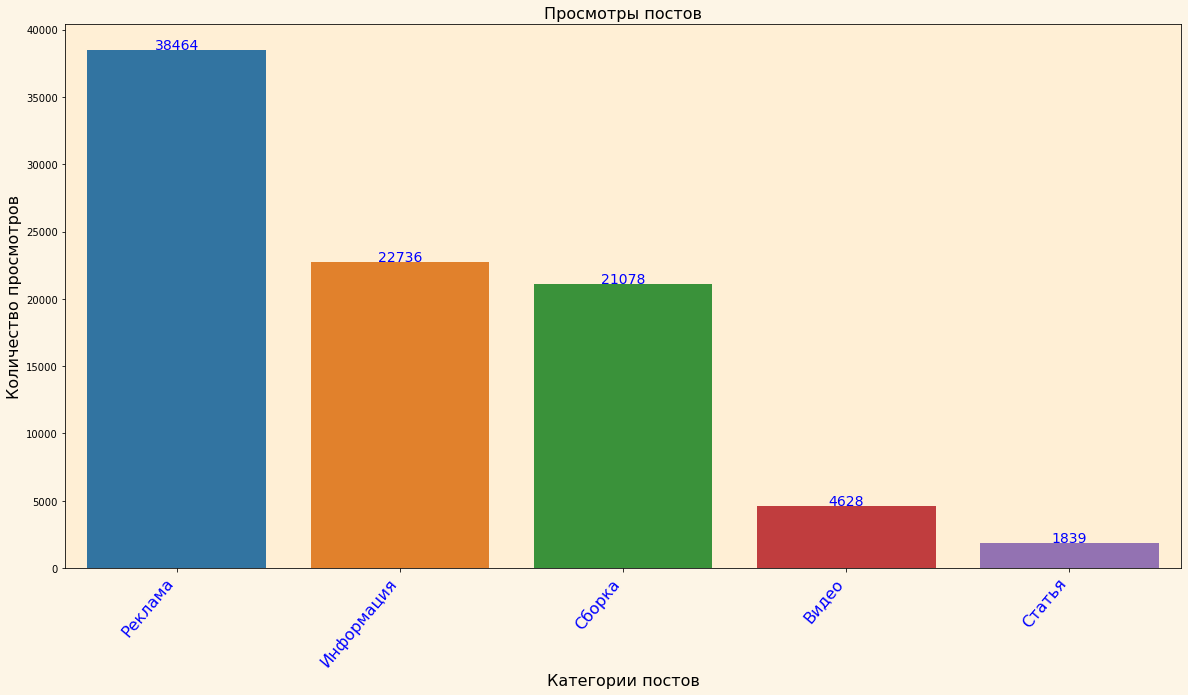

In [40]:
# Гистограмма общего количества просмотров постов по категориям

views = vk_report(vk).sort_values('sum_views', ascending=False)
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('oldlace')   # Цвет холста - oldlace

plt.title('Просмотры постов', fontsize=16)

ax_sum=sns.barplot(x='category', 
            y='sum_views', 
            data=views)
ax_sum.set_xlabel('Категории постов', fontsize=16)
ax_sum.set_ylabel('Количество просмотров', fontsize=16)
ax_sum.set_xticklabels(views.category,
                  fontsize = 16, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 50,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание

ax_sum.set(facecolor = 'papayawhip')   # Цвет фона

# annotation here
for p in ax_sum.patches:
             ax_sum.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='b', xytext=(0, 5),
                 textcoords='offset points')

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Постов всего.png', bbox_inches = 'tight')

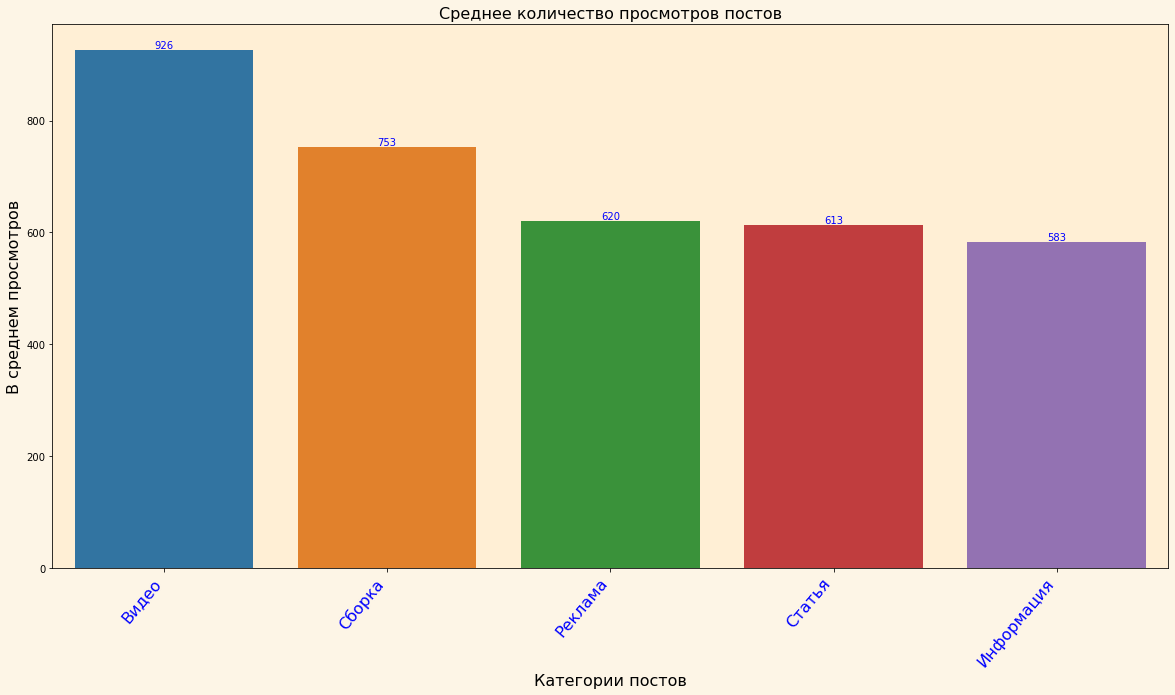

In [41]:
# Гистограмма среднего количества просмотров постов по категориям

views = vk_report(vk).sort_values('mean_views', ascending=False)
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('oldlace')   # Цвет холста - oldlace

plt.title('Среднее количество просмотров постов', fontsize=16)

ax_sum=sns.barplot(x='category', 
            y='mean_views', 
            data=views)
ax_sum.set_xlabel('Категории постов', fontsize=16)
ax_sum.set_ylabel('В среднем просмотров', fontsize=16)
ax_sum.set_xticklabels(views.category,
                  fontsize = 16, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 50,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание

ax_sum.set(facecolor = 'papayawhip')   # Цвет фона

# annotation here
for p in ax_sum.patches:
             ax_sum.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Постов среднее.png', bbox_inches = 'tight')

<ipython-input-42-5ba4a42d6af1>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


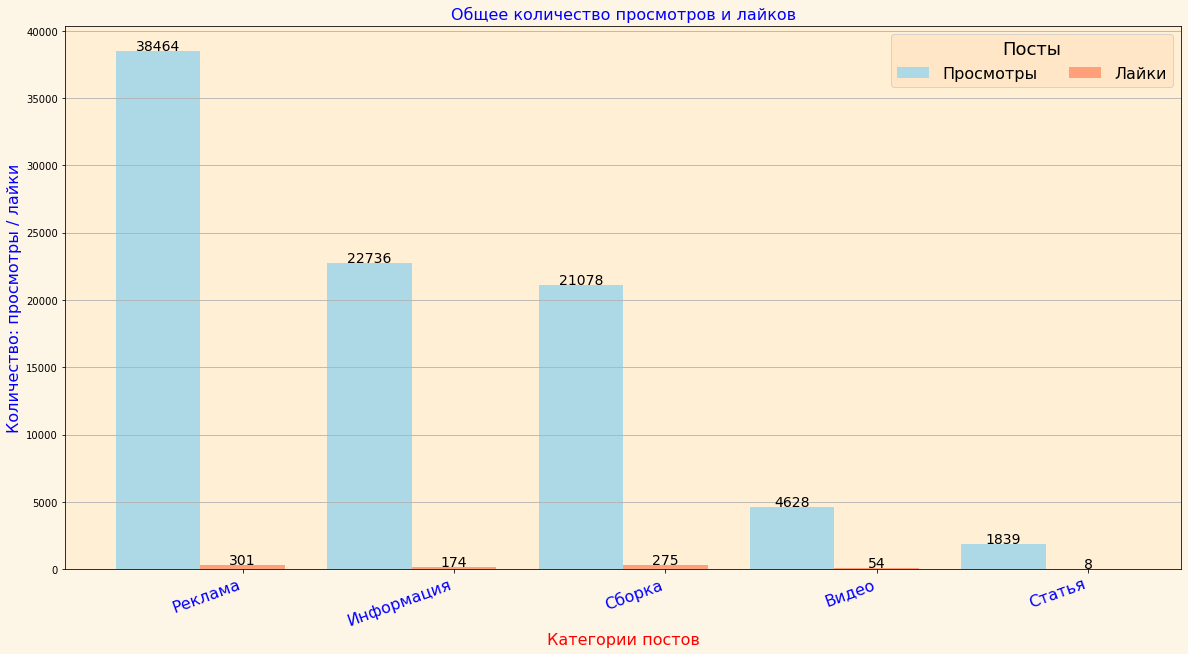

In [42]:
# Гистограмма количества просмотров и лайков постов по категориям
report = vk_report(vk).sort_values('sum_views', ascending=False)
#views = pd.merge(views_sum, likes_sum, left_on ='category', right_on = 'category', how='left')
#views = views_3.sort_values('sum_views', ascending=False)

fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('oldlace')

plt.title('Общее количество просмотров и лайков', fontsize=16, color = 'b')

width = 0.2
x = np.arange(1, report.shape[0]+1)
# .to_list()
views = report.sum_views.to_list()
likes = report.sum_likes.to_list()

ax = plt.subplot(111)
views = ax.bar(x-width, report.sum_views, width = 0.4, color='lightblue', align='center', label = 'Просмотры')
likes = ax.bar(x+width, report.sum_likes, width = 0.4, color='lightsalmon', align='center', label = 'Лайки')

ax.set_ylabel('Количество: просмотры / лайки', fontsize=16, color = 'b')
ax.set_xticks(x+width)

ax.set_xticklabels(report.category,
                  fontsize = 16, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание

ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'bisque',    #  цвет области
          title = 'Посты',    #  заголовок
          title_fontsize = '18'    #  размер шрифта заголовка
         )

ax.set_xlabel('Категории постов', fontsize=16, color = 'r')
# горизонтальные линии сетки:
ax.grid(axis = 'y')
ax.set(facecolor = 'papayawhip'),   # Цвет фона
                   

def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(views)
autolabel(likes)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Просмотры и лайки.png', bbox_inches = 'tight')

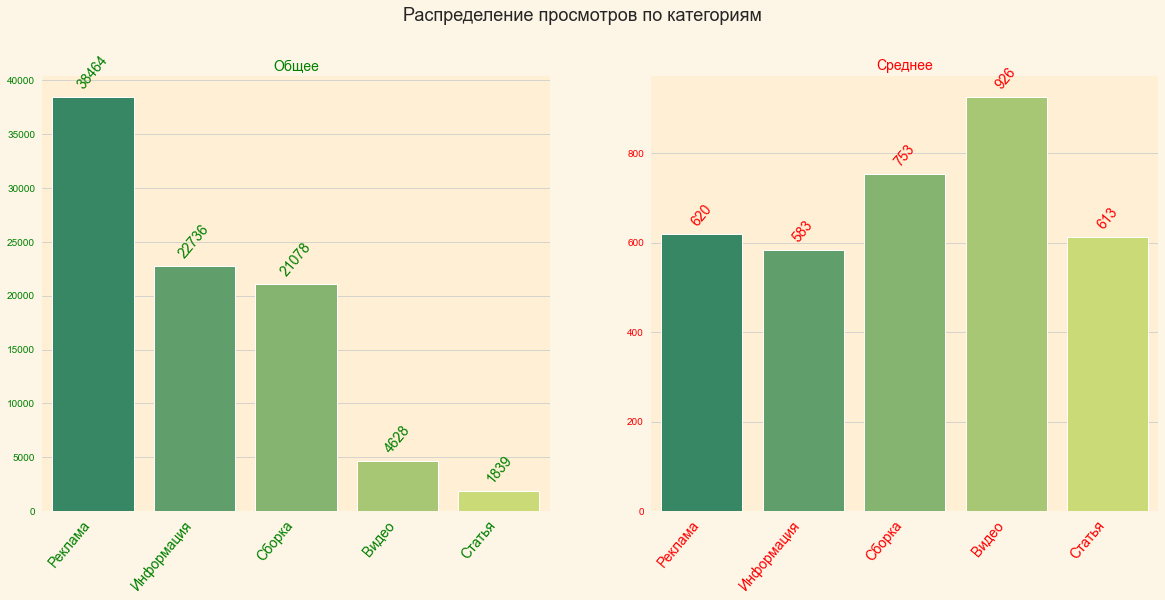

In [45]:
# Гистограмма общего и среднего количества просмотров постов по категориям
report = vk_report(vk)

from matplotlib import rcParams

# Поменяли настройки границ по умолчанию - остальную функцию оставили без изменений
rcParams['axes.spines.bottom'] = False
rcParams['axes.spines.left'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

# Графики распределения покупок по категориям товаров
figsize = (20, 8)
facecolor='yellow'   # 'papayawhip' Цвет фона
suptitle_fontsize = 18
title_fontsize = 14
ticklabels_fontsize = 10
label_fontsize = 12

color=['g', 'r']
data='report'
suptitle='Распределение просмотров по категориям'
title=['Общее', 'Среднее']
x_label=''
y_label=['', '']
# ax.set_facecolor('papayawhip')   # Цвет фона

# plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, 2, figsize=figsize) #, facecolor='red' , sharex=True
fig.set_facecolor('oldlace')
# sns.set(rc={'axes.facecolor':'red', 'figure.facecolor':'oldlace'})
# sns.set(rc={'axes.facecolor':'red'})


# Установить цвет фона холста, различные цвета будут иметь эффект градиента
# fig.set_backgroundgradient('lightblue', 'pink')
# fig.set_facecolor('lightblue':'pink')

sns.barplot(x='category', 
            y='sum_views', 
            data=report,
            palette='summer',
            ax = ax[0])
sns.barplot(x='category', 
            y='mean_views', 
            data=report,
            palette='summer',
            ax = ax[1])

sns.set_style("whitegrid", {'axes.spines.left': False,
                            'axes.spines.bottom': False,
                            'axes.spines.right': False,
                            'axes.spines.top': False})

# Заголовок области Figure:
fig.suptitle(suptitle, y = 1, fontsize = suptitle_fontsize)

for i in range(2):
    ax[i].set(facecolor = 'papayawhip')   # Цвет фона
# ax[1].set(facecolor = 'papayawhip')   # Цвет фона

ax[0].set_xticklabels(report.category,
                  fontsize = title_fontsize, # horizontal
                   color = 'g',    #  Цвет текста
                   rotation = 50,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[1].set_xticklabels(report.category,
                  fontsize = title_fontsize, # horizontal
                   color = 'r',    #  Цвет текста
                   rotation = 50,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание

for i in range(2):
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_color(color[i])
# выбираем отображение горизонтальных линий сетки
#     ax[i].grid(axis = 'y')

# ax.set(facecolor = 'papayawhip')   # Цвет фона

#  Заголовки областей Axes:
    ax[i].set_title(title[i], fontsize=title_fontsize, color=color[i])
# ax[0].set_title('Количество покупок', fontsize=12, color = 'b')
# ax[1].set_title('Денежные затраты', fontsize=12, color = 'r')

# Заголовки осей:
    ax[i].set_xlabel(x_label, fontsize=label_fontsize, color=color[i])
    ax[i].set_ylabel(y_label[i], fontsize=label_fontsize, color=color[i])
# ax[0].set_xlabel('Категории товаров', fontsize=10, color = 'b')
# ax[0].set_ylabel('Количество покупок, шт.', fontsize=10, color = 'b')
# ax[1].set_xlabel('Категории товаров', fontsize=10, color = 'r')
# ax[1].set_ylabel('Денежные затраты, руб.', fontsize=10, color = 'r')

# annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=title_fontsize, color=color[i], xytext=(0, 5), rotation = 50,
                       textcoords='offset points')

# for p in ax[1].patches:
#              ax[1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                             ha='center', va='bottom', fontsize=10, color='r', xytext=(0, 5), rotation = 50,
#                             textcoords='offset points')
#plt.grid(True)
plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Просмотры общая.png', bbox_inches = 'tight')
# fig.savefig('blocks/python/plots/hist.png', bbox_inches = 'tight')